This notebook is intended to show a straight-forward set of examples of how samples can be drawn from a Gaussian process, and it's intended for producing nice animations for the notes.

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [20]:
import pymc3 as pm

In [70]:
from IPython.display import HTML

In [110]:
x = np.linspace(0, 10, 10)
y = np.sin(3.2*x) * np.exp(-0.1*x)

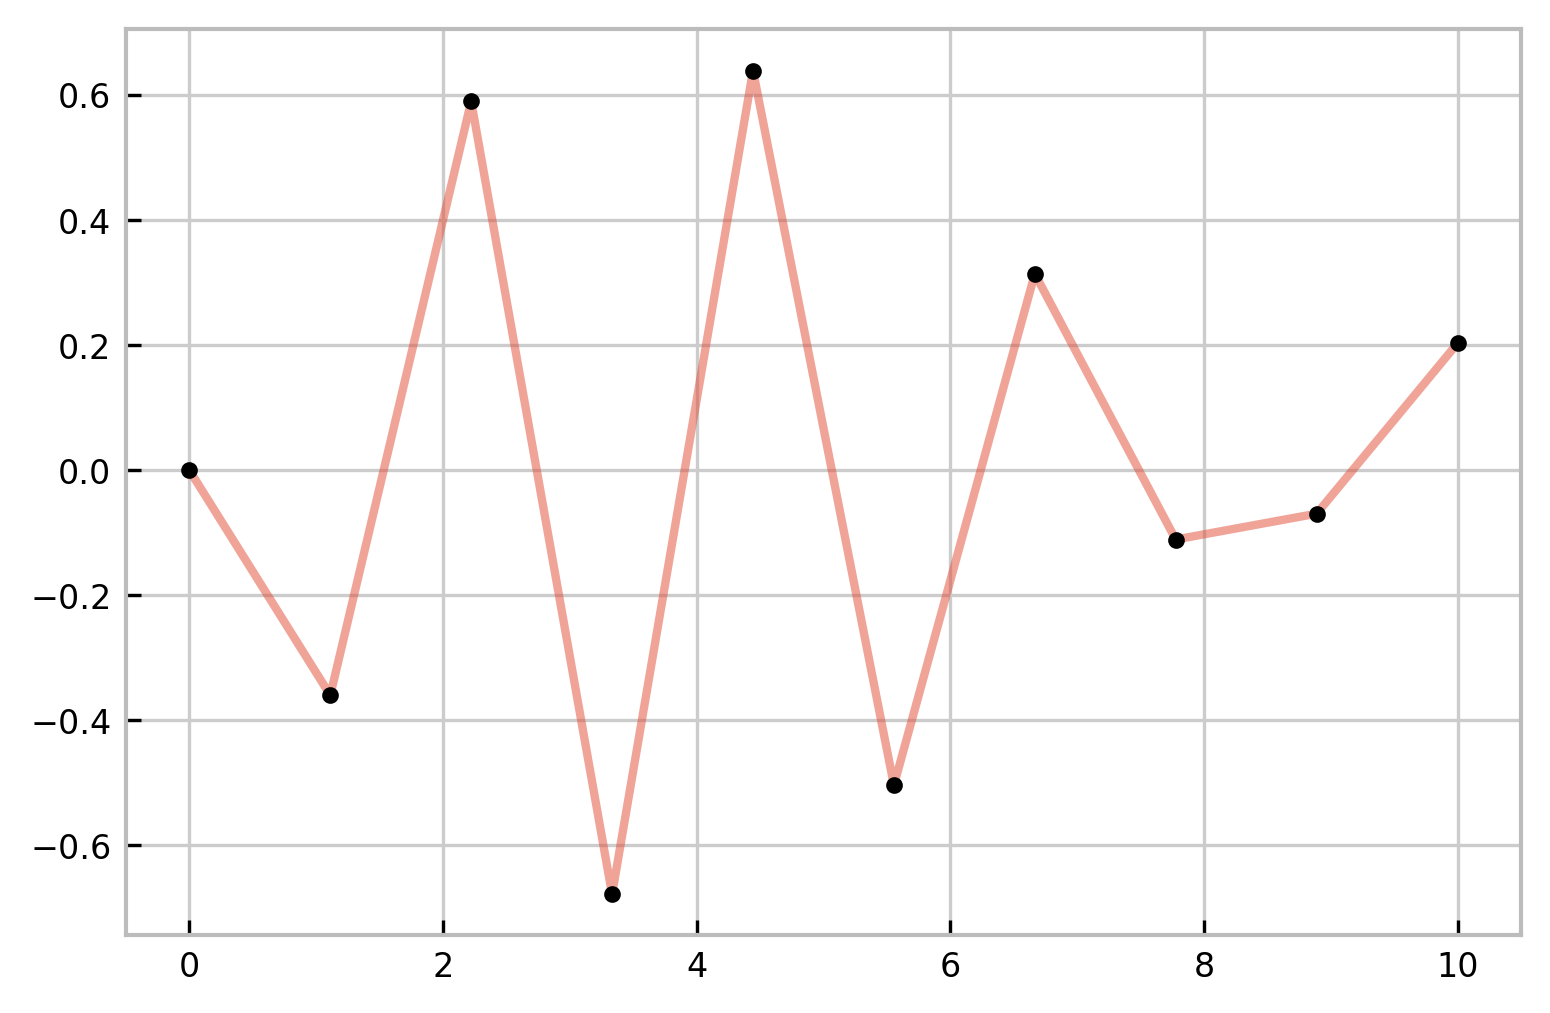

In [111]:
f, ax = plt.subplots(1,1, dpi=300)
ax.plot(x, y, lw=2, alpha=0.5)
ax.plot(x,y, '.', c='k')

In [155]:
def animate_gpr(x, y, frames=100):
    
    x_new = np.linspace(-1, 12, 1000)[::,None]
    
    with pm.Model() as model:
        # Specify the covariance function.
        cov_func = pm.gp.cov.ExpQuad(1, 0.7)

        # Specify the GP.  The default mean function is `Zero`.
        gp = pm.gp.Marginal(cov_func=cov_func)

        # 
        sigma = pm.Normal("sigma", 0, 2)
        y_ = gp.marginal_likelihood("y", X=x[::,None], y=y, noise=sigma)
        
    with model:
        mp = pm.find_MAP()
        
    with model:
        f_pred = gp.conditional("f_pred", x_new)
        
    with model:
        pred_samples = pm.sample_posterior_predictive([mp], samples=1, vars=[f_pred], size=frames)
        
    mu, var = gp.predict(x_new, point=mp, diag=True)
    sd = np.sqrt(var)
    
    from matplotlib.animation import FuncAnimation

    fig = plt.figure(dpi=50, figsize=(5,2))
    ax = plt.axes(xlim=(-1, 12), ylim=(-2, 2))
    line, = ax.plot([], [], lw=1)

    ax.plot(x_new, mu, alpha=0.5)

    ax.fill_between(x_new.flatten(), mu + sd, mu - sd, alpha=0.2)

    ax.plot(x, y, '.', c="k")

    def init():
        line.set_data([], [])
        return line,
    def animate(i):
        x = x_new
        y = pred_samples['f_pred'][0][i]
        line.set_data(x, y)
        return line,

    anim = FuncAnimation(fig, animate, init_func=init,
                                   frames=100, interval=100, blit=False)
    HTML(anim.to_html5_video())

In [ ]:
x = np.linspace(0, 10, 1)
y = np.sin(3.2*x) * np.exp(-0.1*x)

In [ ]:
animate_gpr(x, y)

/home/daniel/.pyenv/versions/3.7.4/envs/teaching-stats/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/home/daniel/.pyenv/versions/3.7.4/envs/teaching-stats/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -12.181, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 26.10it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

In [115]:
with model:
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:02<00:00, 718.56draws/s]


In [116]:
with model:
    f_pred = gp.conditional("f_pred", x_new)

In [150]:
with model:
    pred_samples = pm.sample_posterior_predictive(trace, samples=100, vars=[f_pred], size=100)

  0%|          | 0/100 [00:00<?, ?it/s]/home/daniel/.pyenv/versions/3.7.4/envs/teaching-stats/lib/python3.7/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
100%|██████████| 100/100 [02:01<00:00,  1.22s/it]


In [151]:
mu, var = gp.predict(x_new, point=mp, diag=True)
sd = np.sqrt(var)

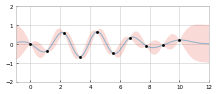

In [153]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(dpi=50, figsize=(5,2))
ax = plt.axes(xlim=(-1, 12), ylim=(-2, 2))
line, = ax.plot([], [], lw=1)

ax.plot(x_new, mu, alpha=0.5)

ax.fill_between(x_new.flatten(), mu + sd, mu - sd, alpha=0.2)

ax.plot(x, y, '.', c="k")

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = x_new
    y = pred_samples['f_pred'][0][i]
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=False)

In [154]:
HTML(anim.to_html5_video())